In [1]:
pip install pandas numpy scikit-learn

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Cargar los datos
data = pd.read_csv('heart_cleveland_upload.csv')

# Exploración inicial
print(data.head())
print(data.info())
print(data.describe())

# Manejo de valores faltantes
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

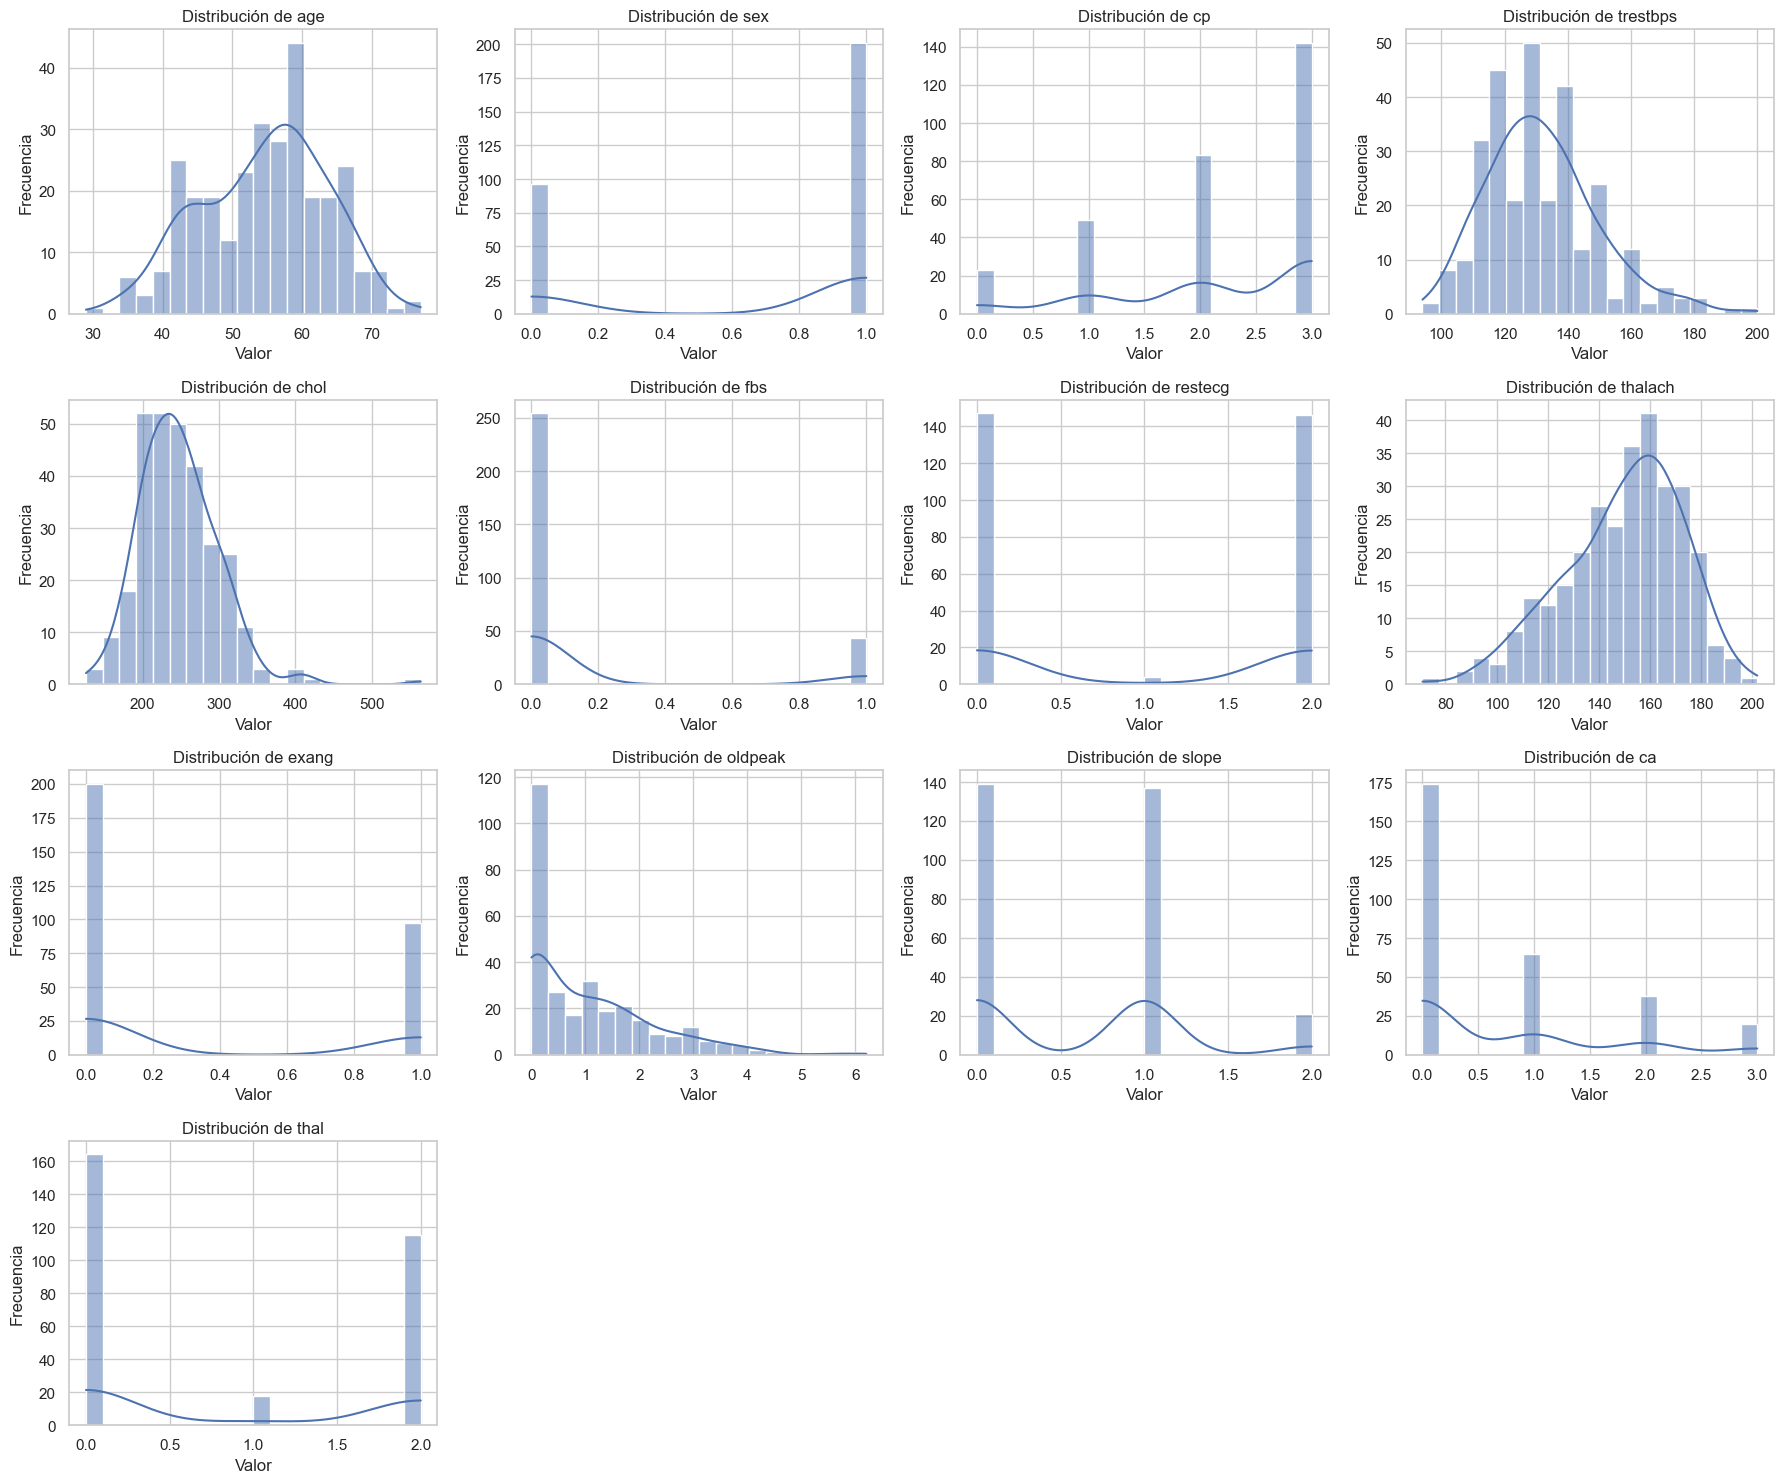

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar tamaño de figura y estilo
plt.figure(figsize=(18, 15))
sns.set(style="whitegrid")

# Listado de nombres de las columnas para el bucle
columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Graficar cada característica en un subgráfico
for i, col in enumerate(columnas, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=20, kde=True)  # Histograma con KDE (curva de densidad)
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [29]:
# Separación de características y variable objetivo
X = data.drop(columns='condition')
y = data['condition']

# Selección de características
selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
selector.fit(X, y)
X = selector.transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajuste de hiperparámetros
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Predicciones y evaluación
y_pred = best_model.predict(X_test)

print(f"Precisión del modelo: {accuracy_score(y_test, y_pred)}")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Visualizar la curva ROC (requiere una biblioteca de visualización como matplotlib)

# Interpretación del modelo
print(best_model.coef_)  # Coeficientes de las características

Precisión del modelo: 0.8222222222222222
Matriz de confusión:
[[42  6]
 [10 32]]
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        48
         1.0       0.84      0.76      0.80        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90

[[ 0.0850478   0.1686526   0.0647268   0.05016988 -0.21275952  0.22483534
   0.23661027  0.29261372]]


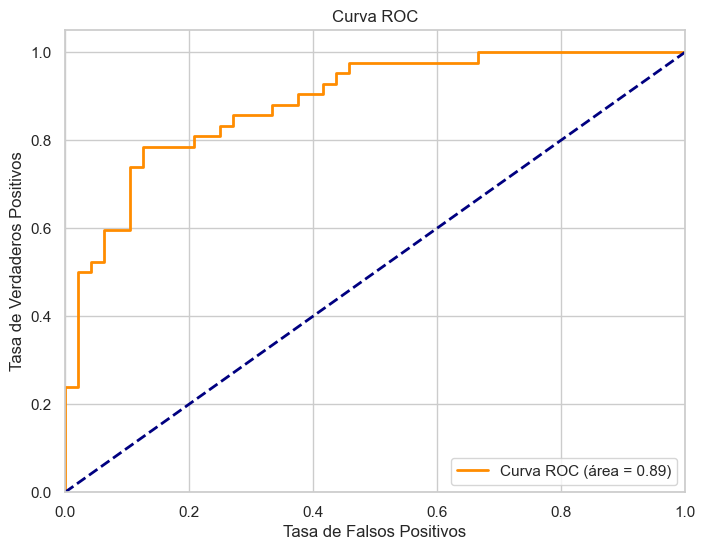

In [31]:
# Visualización de la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Predichos')

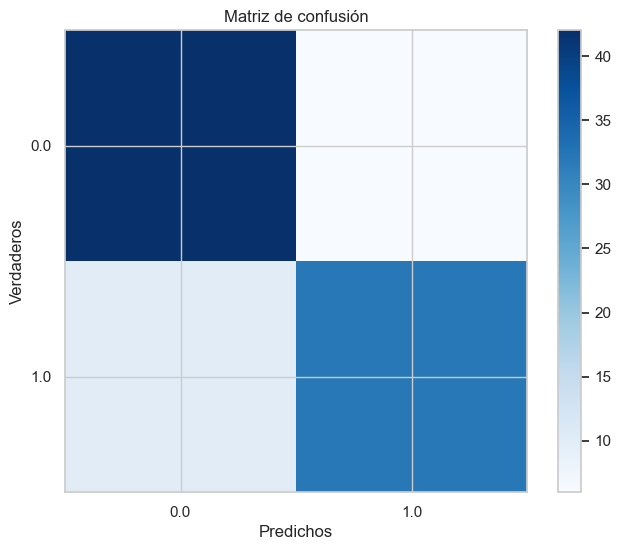

In [35]:
# Matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.ylabel('Verdaderos')
plt.xlabel('Predichos')